<a href="https://colab.research.google.com/github/engSalah-dot/Machine-Learning-from-scratch-to-advanced/blob/main/fashion-mnist-classifier%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Datasets Model**

In [3]:
import tensorflow as tf
import numpy as np
!pip install -U tensorflow_datasets
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
tfds.disable_progress_bar()
import math


In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
datasets,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)
class_names=metadata.features['label'].names
train_datasets,test_datasets=datasets['train'],datasets['test']


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
x=metadata.splits['train'].num_examples
y=metadata.splits['test'].num_examples
print(x,y)


60000 10000


In [7]:
def Normalize(images,lables):

  images=tf.cast(images,tf.float32)
  images/=255
  return images,lables
train_datasets=train_datasets.map(Normalize)
test_datasets =test_datasets.map(Normalize)
train_datasets=train_datasets.cache()
test_datasets=test_datasets.cache()

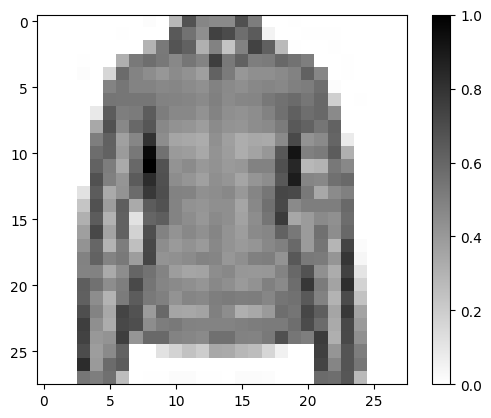

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image,label in test_datasets.take(1):
  break
image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


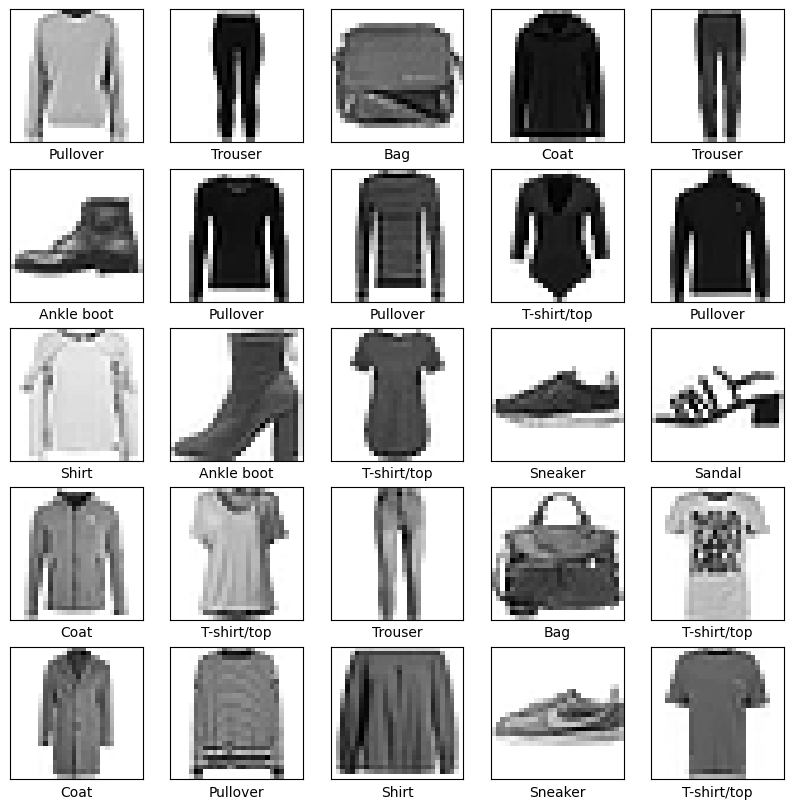

In [9]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_datasets.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [11]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)

                           ])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])


In [13]:
Batch_size=32
train_datasets=train_datasets.cache().repeat().shuffle(x).batch(Batch_size)
test_datasets=test_datasets.cache().batch(Batch_size)
#

In [15]:
model.fit(train_datasets,epochs=5,steps_per_epoch=math.ceil(x/Batch_size))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7760 - loss: 0.6310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8607 - loss: 0.3916
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8801 - loss: 0.3382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8823 - loss: 0.3200
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8910 - loss: 0.2959


In [17]:
test_loss, test_accuracy=model.evaluate(test_datasets,steps=math.ceil(y/32))
print('Accuracy on test dataset:',test_accuracy)
print('Loss on test dataset:',test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.3429
Accuracy on test dataset: 0.8718000054359436
Loss on test dataset: 0.3507092595100403


In [22]:
for test_image,test_label in test_datasets.take(1):
  test_image=test_image.numpy()
  test_label.numpy()
  prediction=model.predict(test_image)
  print(prediction.shape)
  print(prediction[0])
  print(np.argmax(prediction[0]))
  print(class_names[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(32, 10)
[2.0225456e-05 2.4493056e-06 1.1201347e-01 1.0934785e-05 8.4081364e-01
 6.4445360e-10 4.7101226e-02 2.5377886e-09 3.7928665e-05 4.7625126e-09]
4
Coat


In [38]:
def plot_image(i,prediction_array,true_label,img):
  prediction_array,true_label,img=prediction[i],test_label[i],test_image[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0],cmap=plt.cm.binary)
  prdicted_label=np.argmax(prediction_array)
  if prdicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[prdicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i,prediction_array,true_label):
   prediction_array,true_label=prediction[i],test_label[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   thisplot=plt.bar(range(10),prediction_array,color="#777777")
   plt.ylim([0,1])
   prdicted_label=np.argmax(prediction_array)
   thisplot[prdicted_label].set_color('red')
   thisplot[true_label].set_color('blue')




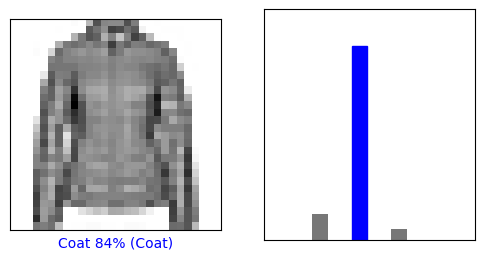

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_label)

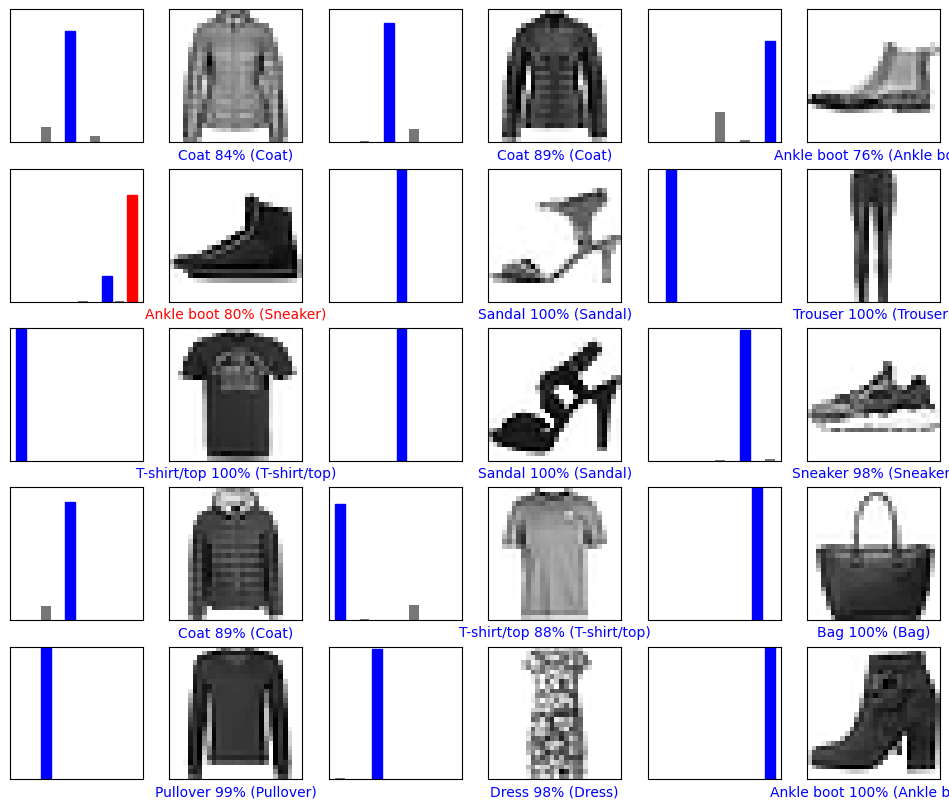

In [50]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_image(i,prediction,test_label,test_image)
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_value_array(i,prediction,test_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[2.0225476e-05 2.4493036e-06 1.1201348e-01 1.0934786e-05 8.4081370e-01
  6.4445244e-10 4.7101252e-02 2.5377840e-09 3.7928701e-05 4.7625131e-09]]
Coat


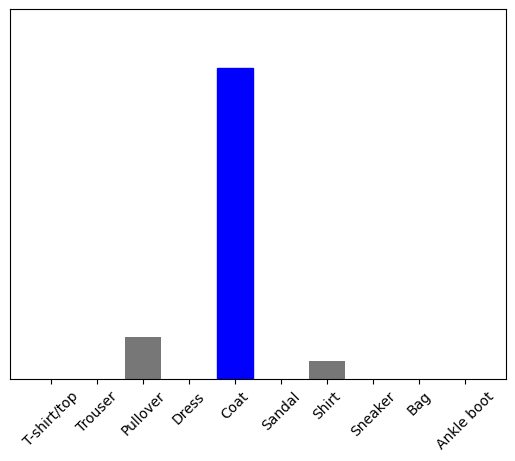

In [57]:
img=test_image[0]

img=np.array([img])
img.shape
pred=model.predict(img)
print(pred)
prediction_label=np.argmax(pred[0])
print(class_names[prediction_label])
plot_value_array(0, pred, test_label)
_ = plt.xticks(range(10), class_names, rotation=45)